<a href="https://colab.research.google.com/github/eermis1/Data_Science_Repository/blob/master/Auto-Encoders/CNN_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network Autoencoder Application**
*A MNIST CNN Autoencoder Application with Keras by Evren Ermiş for BOUN SWE.591 (29-Apr-2020)*

## **1. Import Required Libraries**

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras import initializers
from keras.models import Model
from keras import backend as K
from keras import losses
from sklearn.manifold import TSNE
print(tf.__version__)

TensorFlow 1.x selected.


Using TensorFlow backend.


1.15.2


## **2. Extract and Evaluate Data**

In [0]:
# Exract data from MNIST dataset.

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Shape of x_train = (60000, 28, 28)
Shape of x_test = (10000, 28, 28)

Now, lets have a look at a particular data in training set

Max pixel data of x_train[0]= 255
Min pixel data of x_train[0]= 0

.  --> As you seen as above, the pixel data is not in a range between 0 and 1 (grayscale)
.  --> To improve the the performance, make it easy to learn for network it is better to normalize them.

.  --> Just an illusration


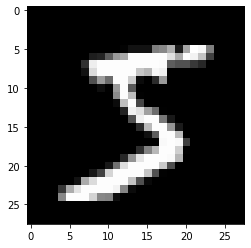

In [0]:
# Evaluate dataset

print("Shape of x_train =" + " " + str(x_train.shape))
print("Shape of x_test =" + " " + str(x_test.shape))

print("\n" + "Now, lets have a look at a particular data in training set" +"\n")

print("Max pixel data of x_train[0]=" + " " + str(x_train[0].max()))
print("Min pixel data of x_train[0]=" + " " + str(x_train[0].min()) + "\n")
print(".  --> As you seen as above, the pixel data is not in a range between 0 and 1 (grayscale)")
print(".  --> To improve the the performance, make it easy to learn for network it is better to normalize them." + "\n")

print(".  --> Just an illusration")
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [0]:
# Normalization of x_train, x_test (makin the pixel values between 0 and 1

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Reshape the x_train and x_test data to make them proper to be an input for CNN

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

# Check whether is everything OK
print("Shape of x_train =" + " " + str(x_train.shape))
print("Shape of x_test =" + " " + str(x_test.shape))

#x_train[0] Process is completed 

Shape of x_train = (60000, 28, 28, 1)
Shape of x_test = (10000, 28, 28, 1)


## **3. Building the Model**

In [0]:
# Input
input_img = Input(shape=(28, 28, 1)) 

# 1st Convolutional Layer - Encoder
x = Conv2D(16, (3, 3), activation='relu', kernel_initializer = initializers.glorot_uniform(seed=2), padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

# 2nd Convolutional Layer - Encoder
x = Conv2D(8, (3, 3), activation='relu', kernel_initializer = initializers.glorot_uniform(seed=2), padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Flatten CovNet Output to be able to Use for FCN
x = Flatten()(x)

# 1st FCN Layer - Encoded Version - Embeddings Created
encoded = Dense(20, activation="sigmoid", kernel_initializer = initializers.glorot_uniform(seed=2),name="encoded")(x)

# 2nd FCN Layer - Decoder
x = Dense(400, activation="relu", kernel_initializer = initializers.glorot_uniform(seed=2))(encoded)

# 3rd FCN Layer - Encoded Version - Final Output
decoded = Dense(784, activation="sigmoid", kernel_initializer = initializers.glorot_uniform(seed=2),name="decoded")(x)

# Overall Model
autoencoder = Model(input_img, decoded)

# See how is the dimensionality
autoencoder.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 392)               0         
___________________________________________

As seen above,

*   Input Shape: (None, 28, 28, 1) 
*   Output Shape: (None, 784) - Flat

> **If we keep them as it is, we could not be able to calculate loss function since the input and output shapes are not equal**

> **To overcome this obstacle, we are going to define new variables called "train_originals" and "test_originals". which are going to be reshaped versions of x_train and x_test**




In [0]:
train_originals = x_train.reshape([len(x_train), 784])
train_originals.shape

(60000, 784)

In [0]:
test_originals = x_test.reshape([len(x_test), 784])
test_originals.shape

(10000, 784)

In [0]:
autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error)

autoencoder.fit(x_train, train_originals, epochs=10, batch_size=28,
                shuffle=True,
                validation_data=(x_test, test_originals))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0117 - val_loss: 0.0074
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0067 - val_loss: 0.0058
Epoch 3/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0053 - val_loss: 0.0047
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0044 - val_loss: 0.0040
Epoch 5/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0039 - val_loss: 0.0036
Epoch 6/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 7/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 8/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0031 - val_loss: 0

In [0]:
test_loss = autoencoder.evaluate(x_test, test_originals)

10000/10000 [==============================] - 0s 50us/step


In [0]:
print("The test loss is" + " " + str(round(test_loss,5)))

The test loss is 0.0029


In [0]:
# Getting Predictions & Evaluation

predictions  = autoencoder.predict(x_test)
predictions.shape

(10000, 784)

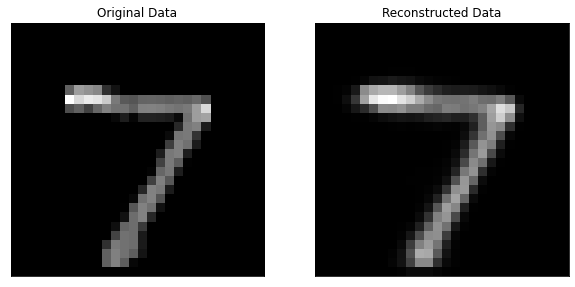

In [0]:
# Another Evaluation - Continue

plt.figure(figsize=(10, 10))

# Original Data
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()
ax.set_title('Original Data')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Reconstructed Data
ax = plt.subplot(1, 2, 2)
plt.imshow(predictions[0].reshape(28, 28))
plt.gray()
ax.set_title('Reconstructed Data')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


## **4. Task-3 | tSNE Mapping**

In [0]:
# Get Data from Layer - Encoded/Embeddings
# https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer

intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer("encoded").output)
embeddings = intermediate_layer_model.predict(x_test)
embeddings.shape

(10000, 20)

In [0]:
# Transform the x_test and encoded data by using t-SNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

tranformed_test_embeddings = TSNE(n_components=2).fit_transform(embeddings)
tranformed_test_originals = TSNE(n_components=2).fit_transform(test_originals)

In [0]:
print("tranformed_test_embeddings shape is=" + " " + str(tranformed_test_embeddings.shape))
print("tranformed_test_originals shape is=" + " " + str(tranformed_test_originals.shape))

tranformed_test_embeddings shape is= (10000, 2)
tranformed_test_originals shape is= (10000, 2)


In [0]:
# Test Embeddings Data Preparations

# Getting Labels from y_test
array = []
for i in range(len(y_test)):
  array.append(y_test[i])
array = np.asarray(array)

# Gathering Them into Pandas DF
df_embed = pd.DataFrame(tranformed_test_embeddings, columns={"dim1", "dim2"})
df_embed["labels"] = array
df_embed.head()

,dim2,dim1,labels
0,-49.554127,-33.946960,7
1,29.177824,-16.270741,2
2,-70.756287,21.483406,1
3,50.191990,18.409851,0
4,14.716804,-61.908344,4


In [0]:
# Original Test Data Preparations

# Getting Labels from y_test
array_2 = []
for i in range(len(y_test)):
  array_2.append(y_test[i])
array_2 = np.asarray(array_2)

# Gathering Them into Pandas DF
df_orj = pd.DataFrame(tranformed_test_originals, columns={"dim1","dim2"})
df_orj["labels"] = array_2
df_orj.head()

,dim2,dim1,labels
0,42.013985,-38.298233,7
1,-64.004189,-28.319298,2
2,-16.128977,-64.684746,1
3,-32.597301,41.164841,0
4,57.574371,43.232231,4


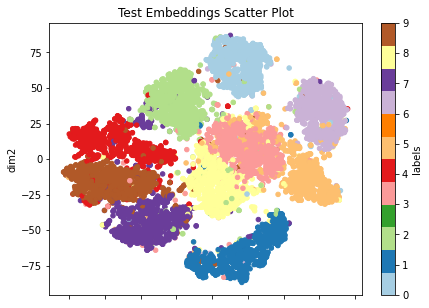

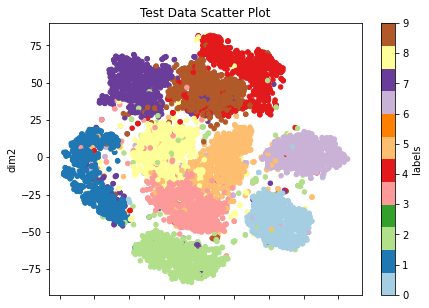

In [0]:
# Plotting the Scatter Plots
ax1 = df_embed.plot.scatter(x='dim1',
                            y='dim2',
                            c='labels',
                            title="Test Embeddings Scatter Plot",
                            figsize=(7,5),
                            colormap='Paired')

ax2 = df_orj.plot.scatter(x='dim1',
                      y='dim2',
                      c='labels',
                      title="Test Data Scatter Plot",
                      figsize=(7,5),
                      colormap='Paired')



## **5. Task-4 | Comparison of Original Image and Reconstructed Image**

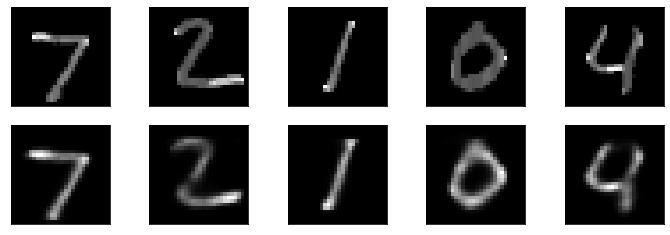

In [0]:
plt.figure(figsize=(12, 4))
for i in range(5): # Show 5 Images
    # display original image
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstructed image
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()